# Phase 6: Business Intelligence & Executive Delivery

**THE FINAL PHASE: BUSINESS INTELLIGENCE PLATFORM**

This notebook demonstrates the complete business intelligence and executive delivery capabilities for the Telco Churn Retention Platform, featuring:

1. **Customer Cohort Analysis**: Intelligent segmentation and risk-based cohorts
2. **Retention Playbooks**: AI-powered, personalized retention strategies
3. **ROI Analysis**: Comprehensive return on investment calculations
4. **KPI Tracking**: Real-time business performance metrics
5. **Experiment Design**: A/B testing framework for retention interventions
6. **Customer Journey Mapping**: Lifecycle analysis and stage transitions
7. **Predictive CLV**: Customer Lifetime Value predictions
8. **Executive Reports**: Presentation-ready business insights
9. **Interactive Dashboards**: Actionable visualizations

## Objectives
- Convert model predictions into actionable business insights
- Generate executive-ready reports and presentations
- Design data-driven retention experiments
- Calculate ROI and business value
- Create personalized retention playbooks
- Map customer journeys and lifecycle stages
- Predict customer lifetime value
- Deliver comprehensive business intelligence platform


In [1]:
print("=" * 80)
print("PHASE 6: BUSINESS INTELLIGENCE PLATFORM INITIALIZATION")
print("=" * 80)

import sys
import warnings
from pathlib import Path

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Add project root to path
print("\nLocating project root...")
PROJECT_ROOT = (
    Path().resolve().parent if (Path().resolve().parent / "src").exists() else Path().resolve()
)
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

print(f"Project root: {PROJECT_ROOT}")

# Import required libraries
print("\nImporting libraries...")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from rich.console import Console
from rich.table import Table

# Set style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (14, 8)
plt.rcParams["font.size"] = 10

# Import business intelligence modules
from src.api.service import ModelService
from src.business.cohorts import CohortAnalyzer
from src.business.kpis import KPITracker
from src.business.roi import ROICalculator
from src.data.ingestion import clean_dataset, load_raw_dataset

console = Console()

print("\n" + "=" * 80)
print("ENVIRONMENT INITIALIZED - READY FOR ANALYSIS")
print("=" * 80)

PHASE 6: BUSINESS INTELLIGENCE PLATFORM INITIALIZATION

Locating project root...
Project root: C:\Users\tiwar\OneDrive - The University of Melbourne\Desktop\New folder\telco-churn-retention

Importing libraries...



ENVIRONMENT INITIALIZED - READY FOR ANALYSIS


## 1. Load Data and Generate Predictions

First, we'll load the customer data and generate churn predictions using our trained model.


In [2]:
# Load customer data
console.print("\n[bold cyan]Loading Customer Data[/bold cyan]")

raw_data_path = PROJECT_ROOT / "data" / "raw" / "telco_data_28_11_2025.csv"

if not raw_data_path.exists():
    raise FileNotFoundError(f"Data file not found: {raw_data_path}")

df = load_raw_dataset(raw_data_path)
df = clean_dataset(df)

console.print(f"[green][OK] Loaded {len(df)} customers[/green]")
console.print(f"[dim]Columns: {len(df.columns)}[/dim]")

# Load model service
console.print("\n[bold cyan]Loading Model Service[/bold cyan]")
models_dir = PROJECT_ROOT / "models"

model_service = ModelService(model_dir=models_dir, threshold=0.5)

if not model_service.is_ready():
    console.print("[red][FAIL] Model service not ready. Please run Phase 3 first.[/red]")
    raise RuntimeError("Model service not ready")

console.print("[green][OK] Model service ready[/green]")

# Generate predictions
console.print("\n[bold cyan]Generating Predictions[/bold cyan]")
predictions = []

for idx, row in df.iterrows():
    customer_dict = row.to_dict()
    result = model_service.predict(customer_dict, include_explanation=False)
    predictions.append(
        {
            "customerID": customer_dict["customerID"],
            "churn_probability": result["churn_probability"],
        }
    )

    if (idx + 1) % 500 == 0:
        console.print(f"  Processed {idx + 1}/{len(df)} customers...")

predictions_df = pd.DataFrame(predictions)
console.print(f"[green][OK] Generated predictions for {len(predictions_df)} customers[/green]")

# Merge data
df_with_predictions = df.merge(predictions_df, on="customerID", how="inner")
console.print("[green][OK] Data ready for analysis[/green]")

# Display summary
console.print("\n[bold]Prediction Summary:[/bold]")
avg_churn_prob = predictions_df["churn_probability"].mean()
high_risk = len(predictions_df[predictions_df["churn_probability"] >= 0.5])
console.print(f"  Average churn probability: {avg_churn_prob:.2%}")
console.print(
    f"  High-risk customers (>=50%): {high_risk} ({high_risk / len(predictions_df) * 100:.1f}%)"
)

Loading Customer Data

[OK] Loaded 7043 customers

Columns: 21

Loading Model Service

[OK] Model service ready

Generating Predictions

Processed 500/7043 customers...

Processed 1000/7043 customers...

Processed 1500/7043 customers...

Processed 2000/7043 customers...

Processed 2500/7043 customers...

Processed 3000/7043 customers...

Processed 3500/7043 customers...

Processed 4000/7043 customers...

Processed 4500/7043 customers...

Processed 5000/7043 customers...

Processed 5500/7043 customers...

Processed 6000/7043 customers...

Processed 6500/7043 customers...

Processed 7000/7043 customers...

[OK] Generated predictions for 7043 customers

[OK] Data ready for analysis

Prediction Summary:

Average churn probability: 41.09%

High-risk customers (>=50%): 2950 (41.9%)

## 2. Customer Cohort Analysis

Intelligent segmentation of customers into actionable cohorts based on churn risk and customer value.


Creating Customer Cohorts

[OK] Created 22 customer cohorts

                           Top 10 Cohorts by Annual Revenue                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Cohort Name             ┃ Risk Level ┃ Customers ┃ Avg Churn Prob ┃ Annual Revenue ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ Low Risk - Loyal        │ low        │      1406 │          12.4% │     $1,210,507 │
│ Critical Risk - At Risk │ critical   │       646 │          84.0% │       $601,440 │
│ High Risk - Loyal       │ high       │       508 │          62.7% │       $538,992 │
│ Medium Risk - Loyal     │ medium     │       553 │          39.7% │       $489,548 │
│ Critical Risk - Growing │ critical   │       424 │          87.3% │       $458,084 │
│ High Risk - At Risk     │ high       │       525 │          64.1% │       $452,044 │
│ Low Risk - Disengaged   │ low        │      1279 │           8.8% │       $346,498 │
│ Low Risk - Vip          │ low        │       257 │          13.4% │       $337,242 │
│ Medium Risk - Vip       │ medium     │       245 │          40.2% │       $315,470 │
│ High Risk - Vip         │ high       │       182 │          61.3% │       $230,136 │
└─────────────────────────┴────────────┴───────────┴────────────────┴────────────────┘

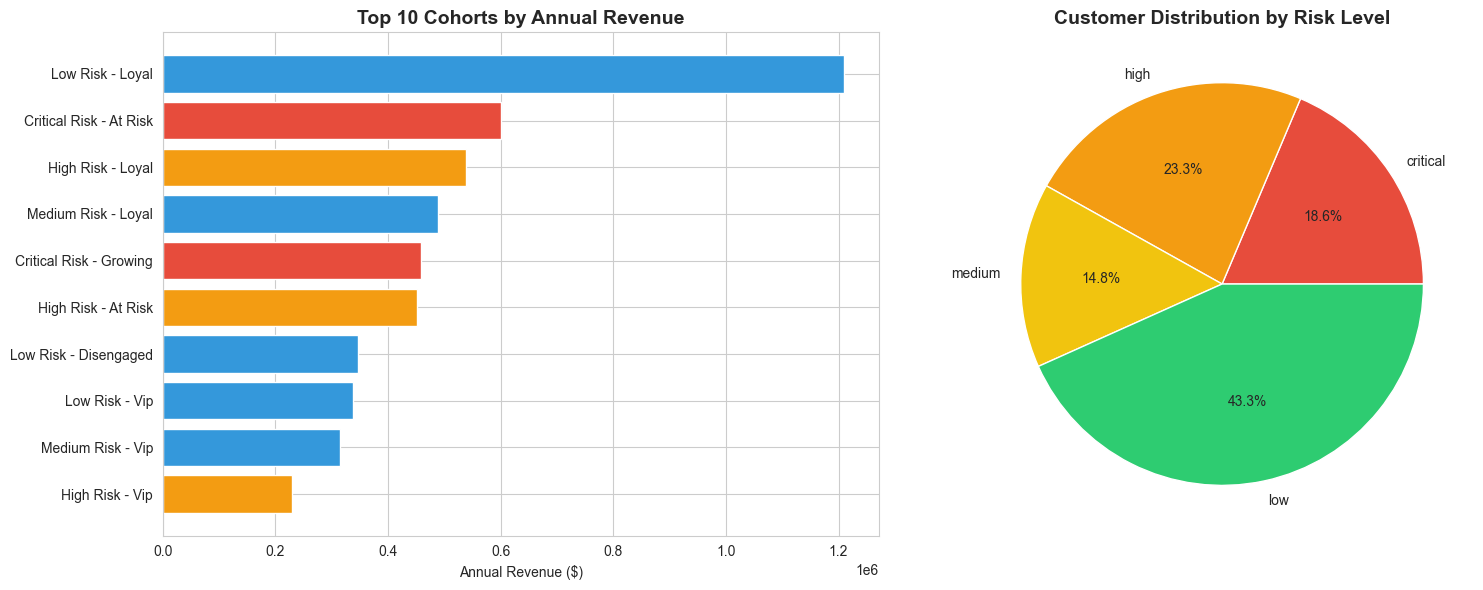

Key Insights:

WARNING: 6 critical-risk cohorts with $1,250,107 annual revenue at risk

In [3]:
# Create customer cohorts
console.print("\n[bold cyan]Creating Customer Cohorts[/bold cyan]")

cohort_analyzer = CohortAnalyzer()
cohorts = cohort_analyzer.create_cohorts(df, predictions_df)

console.print(f"[green][OK] Created {len(cohorts)} customer cohorts[/green]")

# Display top cohorts
top_cohorts = sorted(cohorts, key=lambda c: c.total_annual_revenue, reverse=True)[:10]

table = Table(
    title="Top 10 Cohorts by Annual Revenue", show_header=True, header_style="bold magenta"
)
table.add_column("Cohort Name", style="cyan", no_wrap=True)
table.add_column("Risk Level", style="yellow")
table.add_column("Customers", justify="right", style="green")
table.add_column("Avg Churn Prob", justify="right")
table.add_column("Annual Revenue", justify="right", style="bold green")

for cohort in top_cohorts:
    risk_color = {
        "critical": "[red]",
        "high": "[yellow]",
        "medium": "[blue]",
        "low": "[green]",
    }.get(cohort.risk_level.value, "")

    table.add_row(
        cohort.name,
        f"{risk_color}{cohort.risk_level.value}[/]",
        str(cohort.customer_count),
        f"{cohort.avg_churn_probability:.1%}",
        f"${cohort.total_annual_revenue:,.0f}",
    )

console.print(table)

# Visualize cohorts
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Revenue by cohort
top_10 = sorted(cohorts, key=lambda c: c.total_annual_revenue, reverse=True)[:10]
cohort_names = [c.name[:25] + "..." if len(c.name) > 25 else c.name for c in top_10]
revenues = [c.total_annual_revenue for c in top_10]
colors = [
    "#e74c3c"
    if c.risk_level.value == "critical"
    else "#f39c12"
    if c.risk_level.value == "high"
    else "#3498db"
    for c in top_10
]

axes[0].barh(cohort_names, revenues, color=colors)
axes[0].set_title("Top 10 Cohorts by Annual Revenue", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Annual Revenue ($)")
axes[0].invert_yaxis()

# Risk distribution
risk_counts = {}
for cohort in cohorts:
    risk = cohort.risk_level.value
    risk_counts[risk] = risk_counts.get(risk, 0) + cohort.customer_count

axes[1].pie(
    risk_counts.values(),
    labels=risk_counts.keys(),
    autopct="%1.1f%%",
    colors=["#e74c3c", "#f39c12", "#f1c40f", "#2ecc71"],
)
axes[1].set_title("Customer Distribution by Risk Level", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.show()

console.print("\n[bold]Key Insights:[/bold]")
critical_cohorts = [c for c in cohorts if c.risk_level.value == "critical"]
if critical_cohorts:
    total_critical_revenue = sum(c.total_annual_revenue for c in critical_cohorts)
    console.print(
        f"  WARNING: {len(critical_cohorts)} critical-risk cohorts with ${total_critical_revenue:,.0f} annual revenue at risk"
    )

## 3. Business KPIs & ROI Analysis

Calculate key performance indicators and return on investment for retention initiatives.


Calculating Business KPIs

[OK] KPI metrics calculated

            Key Performance Indicators             
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓
┃ Metric                       ┃            Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩
│ Total Customers              │            7,043 │
│ Customers at Risk            │    3,994 (56.7%) │
│ Total Monthly Revenue        │         $456,117 │
│ Revenue at Risk              │ $295,721 (64.8%) │
│ Estimated Annual Churn       │ 27,780 customers │
│ Estimated Revenue Loss       │       $3,598,160 │
│ Intervention Readiness Score │         32.7/100 │
└──────────────────────────────┴──────────────────┘

Calculating ROI

[OK] ROI metrics calculated

        Return on Investment Analysis         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric                     ┃         Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Customers at Risk          │         2,950 │
│ Annual Revenue at Risk     │    $2,649,473 │
│ Intervention Cost          │      $147,500 │
│ Estimated Churn Prevented  │ 641 customers │
│ Estimated Revenue Saved    │    $1,151,398 │
│ Net Benefit                │    $1,003,898 │
│ ROI                        │        680.6% │
│ Payback Period             │    1.5 months │
│ Cost per Customer Retained │       $230.11 │
└────────────────────────────┴───────────────┘

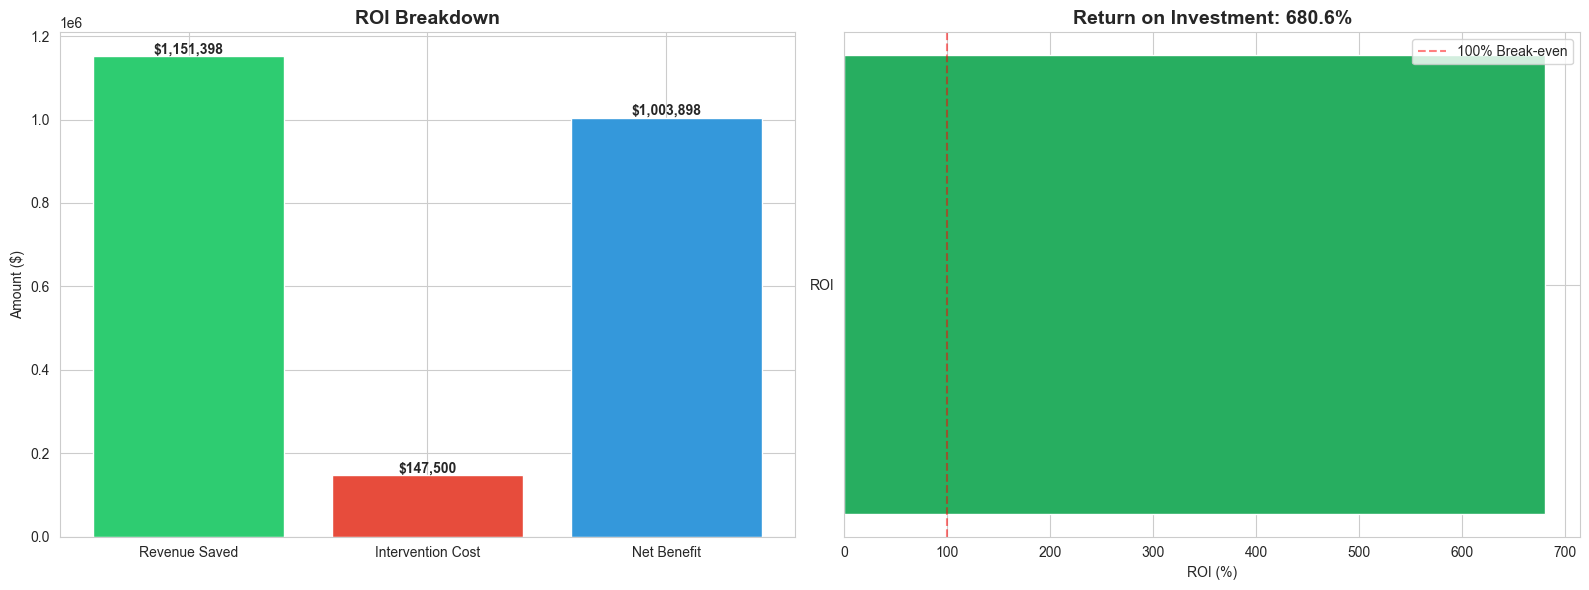

Business Impact:

[OK] ROI of 680.6% demonstrates strong business value

[OK] Payback period of 1.5 months is excellent

[OK] Net benefit of $1,003,898 justifies intervention investment

In [4]:
# Calculate KPIs
console.print("\n[bold cyan]Calculating Business KPIs[/bold cyan]")

kpi_tracker = KPITracker()
kpi_metrics = kpi_tracker.calculate_kpis(
    customers=df,
    predictions=predictions_df,
    model_metrics={"roc_auc": 0.85, "f1": 0.63},  # From model evaluation
)

console.print("[green][OK] KPI metrics calculated[/green]")

# Display KPIs
kpi_table = Table(title="Key Performance Indicators", show_header=True, header_style="bold cyan")
kpi_table.add_column("Metric", style="cyan")
kpi_table.add_column("Value", justify="right", style="green")

kpi_table.add_row("Total Customers", f"{kpi_metrics.total_customers:,}")
kpi_table.add_row(
    "Customers at Risk",
    f"{kpi_metrics.customers_at_risk:,} ({kpi_metrics.at_risk_percentage:.1f}%)",
)
kpi_table.add_row("Total Monthly Revenue", f"${kpi_metrics.total_monthly_revenue:,.0f}")
kpi_table.add_row(
    "Revenue at Risk",
    f"${kpi_metrics.revenue_at_risk:,.0f} ({kpi_metrics.revenue_at_risk_percentage:.1f}%)",
)
kpi_table.add_row("Estimated Annual Churn", f"{kpi_metrics.estimated_annual_churn:,} customers")
kpi_table.add_row("Estimated Revenue Loss", f"${kpi_metrics.estimated_revenue_loss:,.0f}")
kpi_table.add_row(
    "Intervention Readiness Score", f"{kpi_metrics.intervention_readiness_score:.1f}/100"
)

console.print(kpi_table)

# Calculate ROI
console.print("\n[bold cyan]Calculating ROI[/bold cyan]")

roi_calculator = ROICalculator()
roi_metrics = roi_calculator.calculate_roi(
    customers=df,
    predictions=predictions_df,
    intervention_cost_per_customer=50.0,
    churn_threshold=0.5,
)

console.print("[green][OK] ROI metrics calculated[/green]")

# Display ROI
roi_table = Table(title="Return on Investment Analysis", show_header=True, header_style="bold cyan")
roi_table.add_column("Metric", style="cyan")
roi_table.add_column("Value", justify="right", style="green")

roi_table.add_row("Customers at Risk", f"{roi_metrics.total_customers_at_risk:,}")
roi_table.add_row("Annual Revenue at Risk", f"${roi_metrics.total_annual_revenue_at_risk:,.0f}")
roi_table.add_row("Intervention Cost", f"${roi_metrics.intervention_cost:,.0f}")
roi_table.add_row(
    "Estimated Churn Prevented", f"{roi_metrics.estimated_churn_prevented:,} customers"
)
roi_table.add_row("Estimated Revenue Saved", f"${roi_metrics.estimated_revenue_saved:,.0f}")
roi_table.add_row("Net Benefit", f"${roi_metrics.net_benefit:,.0f}", style="bold green")
roi_table.add_row("ROI", f"{roi_metrics.roi_percentage:.1f}%", style="bold green")
roi_table.add_row("Payback Period", f"{roi_metrics.payback_period_months:.1f} months")
roi_table.add_row("Cost per Customer Retained", f"${roi_metrics.cost_per_customer_retained:,.2f}")

console.print(roi_table)

# Visualize ROI
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROI Breakdown
categories = ["Revenue Saved", "Intervention Cost", "Net Benefit"]
values = [
    roi_metrics.estimated_revenue_saved,
    roi_metrics.intervention_cost,
    roi_metrics.net_benefit,
]
colors_roi = ["#2ecc71", "#e74c3c", "#3498db"]
axes[0].bar(categories, values, color=colors_roi)
axes[0].set_title("ROI Breakdown", fontsize=14, fontweight="bold")
axes[0].set_ylabel("Amount ($)")
for i, v in enumerate(values):
    axes[0].text(i, v, f"${v:,.0f}", ha="center", va="bottom", fontweight="bold")

# ROI Percentage
axes[1].barh(["ROI"], [roi_metrics.roi_percentage], color="#27ae60", height=0.3)
axes[1].set_title(
    f"Return on Investment: {roi_metrics.roi_percentage:.1f}%", fontsize=14, fontweight="bold"
)
axes[1].set_xlabel("ROI (%)")
axes[1].axvline(100, color="red", linestyle="--", alpha=0.5, label="100% Break-even")
axes[1].legend()

plt.tight_layout()
plt.show()

console.print("\n[bold green]Business Impact:[/bold green]")
console.print(f"  [OK] ROI of {roi_metrics.roi_percentage:.1f}% demonstrates strong business value")
console.print(
    f"  [OK] Payback period of {roi_metrics.payback_period_months:.1f} months is excellent"
)
console.print(
    f"  [OK] Net benefit of ${roi_metrics.net_benefit:,.0f} justifies intervention investment"
)